In [2]:
from moving_averages import exponential_hull_ma, calculate_ema
from yfinance_utils import get_ticker_data
import polars as pl

In [3]:
spx = pl.DataFrame(get_ticker_data("^SPX")[1][-500:])

YF.download() has changed argument auto_adjust default to True


In [4]:
close = spx['close_price'].to_numpy()

In [5]:
import numpy as np

def get_ema(data, period):
    alpha = 2 / (period + 1)
    out = np.empty_like(data, dtype=float)
    out[0] = data[0]
    for i in range(1, len(data)):
        out[i] = alpha * data[i] + (1 - alpha) * out[i - 1]
    return out

def corrected_exponential_hull_moving_average(data, period):
    data = np.asarray(data, dtype=float)
    # Use half period and square-root period (ensuring at least 1)
    period_half = max(1, int(round(period / 2)))
    period_sqrt = max(1, int(round(np.sqrt(period))))
    
    # Calculate intermediate EMAs
    ema_half = get_ema(data, period_half)
    ema_full = get_ema(data, period)
    
    # Compute the difference component and final EMA
    diff = 2 * ema_half - ema_full
    return get_ema(diff, period_sqrt)


def get_sma (data, period):
    weights = np.ones(period) / period  # Equal weights for simple moving average
    return np.convolve(data, weights, mode='valid')

In [14]:
emha = corrected_exponential_hull_moving_average(close, 100)[200:]
ema = get_ema(close, 100)[200:]
sma = get_sma(close,100)[200:]
sma200 = get_sma(close,200)

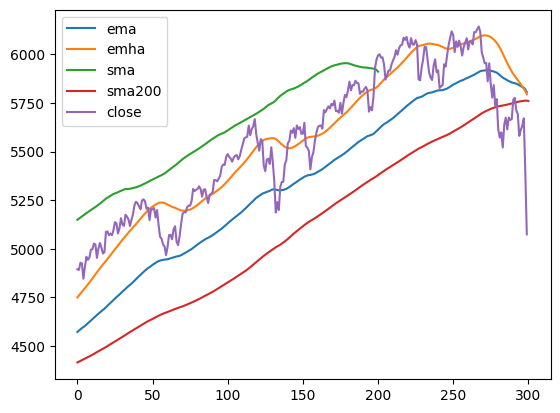

In [15]:
import matplotlib.pyplot as plt
plt.plot(ema, label='ema')
plt.plot(emha, label='emha')
plt.plot(sma, label='sma')
plt.plot(sma200, label='sma200')
plt.plot(close[200:], label='close')
plt.legend()